In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# 1. Chargement des résultats du test
df_pred = pd.read_csv("../data_processed/test_predictions.csv")

# Conversion de la date (perdue lors de la sauvegarde CSV)
df_pred['datetime_utc'] = pd.to_datetime(df_pred['datetime_utc'])


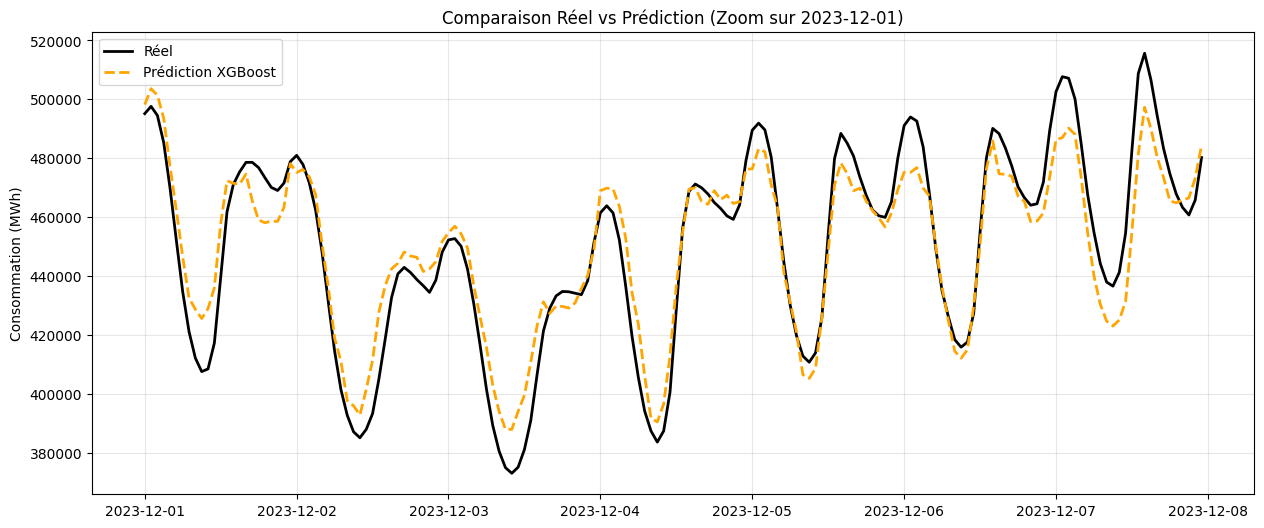

In [7]:
# 2. Visualisation sur une semaine (Zoom)
# On prend une semaine au hasard dans le jeu de test (par ex: début Décembre)
start_zoom = "2023-12-01"
end_zoom = "2023-12-08"

mask = (df_pred['datetime_utc'] >= start_zoom) & (df_pred['datetime_utc'] < end_zoom)
zoom = df_pred.loc[mask]

plt.figure(figsize=(15, 6))

# La Réalité
plt.plot(zoom['datetime_utc'], zoom['demand_mwh'], label='Réel', color='black', linewidth=2)

# Ta Prédiction
plt.plot(zoom['datetime_utc'], zoom['prediction'], label='Prédiction XGBoost', color='orange', linestyle='--', linewidth=2)

plt.title(f"Comparaison Réel vs Prédiction (Zoom sur {start_zoom})")
plt.ylabel("Consommation (MWh)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
